# Coursera - The Finite Element Method - Dynamic Elasticity

## Importing libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Defining parameters

In [2]:
x_n_points = 1000                           # Number of points in X
x_max = 10000                               # Length of the domain, m
dx = x_max/float((x_n_points - 1))
x = np.zeros(x_n_points)                    # Define co-ordinate along X
for i in range(0, x_n_points - 1):
    x[i] = i * dx
x = np.transpose(x)
ele_len = np.diff(x)                        # Length of an element

c_0 = 3000                                  # Velocity of wave in medium, m/s
rho_0 = 2500                                # Density, kg/m3
rho = x*0 + rho_0
mu = x*0 + rho*c_0**2

source_x = 500                              # Location of source, m

t_n_points = 2000                           # Number of time steps
eps = 0.5                                   # CFL stability criteria
dt = 0.5*eps*dx/float(np.max(np.sqrt(mu/rho)))
t = np.arange(1, t_n_points+1)*dt

f_snap = 20                                 # Snapshot frequency

u = np.zeros(x_n_points)                    # Solution at time n
u_next = np.zeros(x_n_points)               # Solution at time n+1
u_old = np.zeros(x_n_points)                # Solution at time n-1

## Defining the mass matrix

In [3]:
M = np.zeros((x_n_points, x_n_points))
for i in range(1, x_n_points - 1):
    for j in range(1, x_n_points - 1):
        if j == i:
            M[i, j] = (rho[i - 1] * ele_len[i - 1] + rho[i] * ele_len[i]) / float(3)
        elif j == i + 1:
            M[i, j] = rho[i] * ele_len[i] / float(6)
        elif j == i - 1:
            M[i, j] = rho[i - 1] * ele_len[i - 1] / float(6)
        else:
            M[i, j] = 0

M[0, 0] = rho[0] * ele_len[0] / float(3)     # Defining the boundary conditions
M[x_n_points - 1,x_n_points - 1] = rho[x_n_points - 1] * ele_len[x_n_points - 2] / float(3)
M_inv = np.linalg.inv(M)                    # Taking inverse of a matrix using np.linalg.inv()


## Defining the stiffness matrix

In [4]:
K = np.zeros((x_n_points, x_n_points))
for i in range(1, x_n_points - 1):
    for j in range(1, x_n_points - 1):
        if i == j:
            K[i, j] = mu[i-1]/float(ele_len[i-1]) + mu[i]/float(ele_len[i])
        elif i == j + 1:
            K[i, j] = -1 * mu[i-1]/float(ele_len[i-1])
        elif i+1 == j:
            K[i, j] = -1 * mu[i]/float(ele_len[i])
        else:
            K[i, j] = 0

K[0, 0] = mu[0]/float(ele_len[0])           # Defining the boundary conditions
K[x_n_points - 1, x_n_points - 1] = mu[x_n_points - 1]/float(ele_len[x_n_points - 2])

## Plotting the Mass and Stiffness matrix as color grid

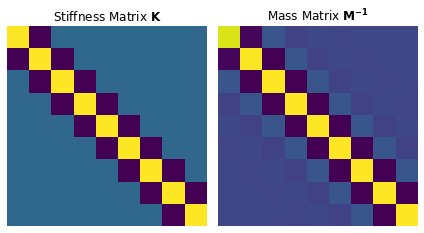

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(K[1:10,1:10])
ax1.set_title('Stiffness Matrix $\mathbf{K}$')
ax1.axis("off")

ax2.imshow(M_inv[1:10,1:10])
ax2.set_title('Mass Matrix $\mathbf{M^{-1}}$')
ax2.axis("off")

plt.tight_layout()
plt.show()

## Plotting the source time function

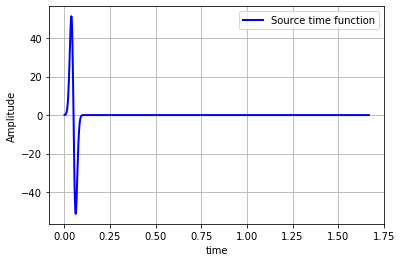

In [8]:
pt = 20*dt     # Gaussian width
t0 = 3*pt      # Time shift
src = -2/float(pt**2) * (t-t0) * np.exp(-1/float(pt**2) * (t-t0)**2)
plt.plot(t, src, color='b', lw=2, label='Source time function')
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.legend()
plt.grid(True)
plt.show()

f = np.zeros(x_n_points)                    # Defining the source function
f[source_x:source_x+1] = f[source_x:source_x+1] + 1

# Solving the FEM equation

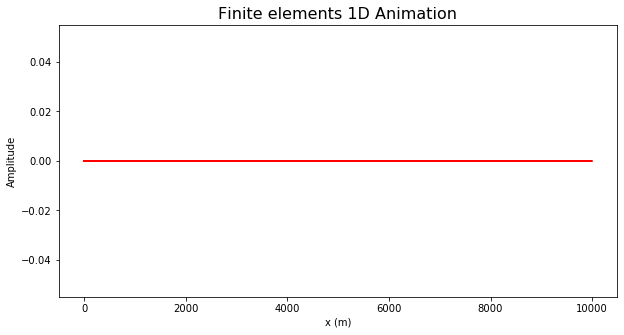

In [7]:
plt.figure(figsize=(10,5))
line1 = plt.plot(x, u, 'r', lw=1.5, label='FEM')
plt.title('Finite elements 1D Animation', fontsize=16)
plt.ylabel('Amplitude')
plt.xlabel('x (m)')

plt.ion()
plt.show()

In [ ]:
for it in range(t_n_points):
    u_next = np.dot((dt**2) * M_inv, (f*src[it] - np.dot(K, u))) + 2*u - u_old
    u_old, u = u, u_next                    # Assigning the solution to the next time step

    if not it % f_snap:
        for l in line1:
            l.remove()
            del l
        line1 = plt.plot(x, u, 'r', lw=1.5, label='FEM')
        plt.legend()
        plt.gcf().canvas.draw()

plt.show()